In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Aim- How many cumstomer are coming in your restaurent per day

In [3]:
rv=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\Time Series Data\RestaurantVisitors.csv",parse_dates=True,index_col="date")
# while reading file date is converted in index col

In [4]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
01-01-2016,Friday,1.0,New Year's Day,65.0,25.0,67.0,139.0,296.0
01-02-2016,Saturday,0.0,na,24.0,39.0,43.0,85.0,191.0
01-03-2016,Sunday,0.0,na,24.0,31.0,66.0,81.0,202.0
01-04-2016,Monday,0.0,na,23.0,18.0,32.0,32.0,105.0
01-05-2016,Tuesday,0.0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
rv.shape

(498, 8)

In [6]:
rv.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 01-01-2016 to nan
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    float64
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(6), object(2)
memory usage: 35.0+ KB


In [10]:
rv.isnull().sum()

weekday         20
holiday         20
holiday_name    20
rest1           20
rest2           20
rest3           20
rest4           20
total           20
dtype: int64

In [11]:
rv=rv.dropna()

In [12]:
rv.shape

(478, 8)

In [13]:
#always drop nulls in Time series

In [14]:
import matplotlib.pyplot as plt

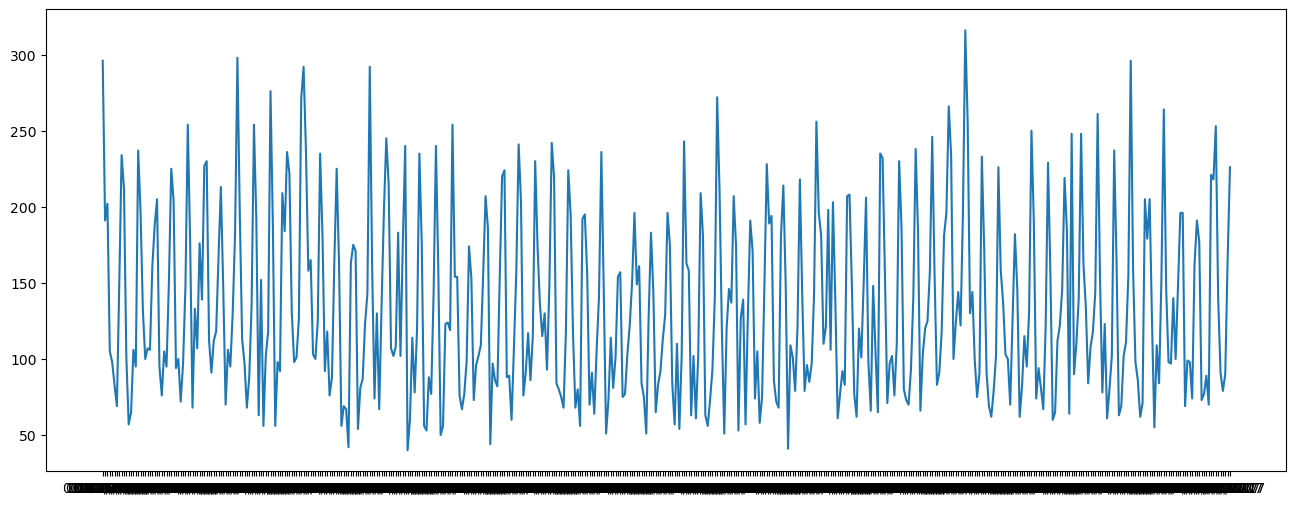

In [15]:
plt.figure(figsize=(16,6))
plt.plot(rv.total);

In [16]:
# if u know sesonality is there so no use of this
from statsmodels.tsa.seasonal import seasonal_decompose
# to confirm to user that data is seasonal 

In [17]:
 rv_seasonal = seasonal_decompose(rv["total"][0:50],period=7)

<Figure size 5000x5000 with 0 Axes>

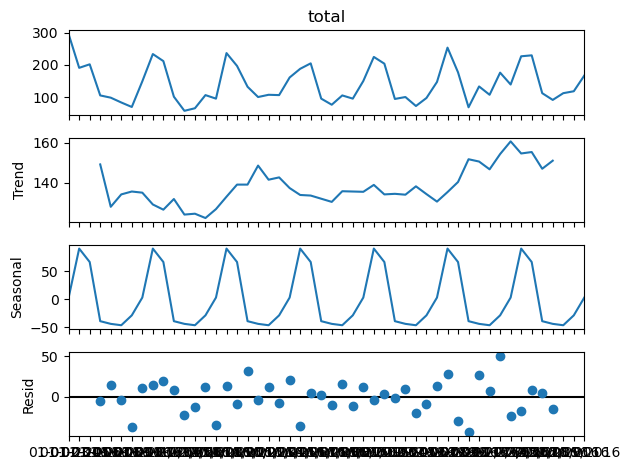

In [18]:
plt.figure(figsize=(50,50))
rv_seasonal.plot();


In [20]:
#Sampling:- Dividing the data into train and test

In [21]:
train_rv=rv.iloc[0:450] # 1st 450 in train it will stop at 449
test_rv=rv.iloc[450:479]

In [22]:
test_rv.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [23]:
from pmdarima import auto_arima

In [24]:
auto_arima(rv["total"],seasonal=True,m=7,exogenous=rv[["holiday"]])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
model1=SARIMAX(train_rv['total'],   order=(0,0,0),    seasonal_order=(1,0,1,7),     exog=train_rv[["holiday"]]  )

In [42]:
results=model1.fit()

In [43]:
pred_rv = results.predict(start = 450 , end = 477,exog=test_rv[["holiday"]])

In [44]:
len(test_rv)

28

In [45]:
len(pred_rv)

28

In [46]:
test_rv['Predicted_X']  = list(np.round(pred_rv))

In [47]:
test_rv

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,Predicted_X,Error
date,,,,,,,,,,
3/26/2017,Sunday,0.0,na,33.0,27.0,48.0,38.0,146.0,169.0,-23.0
3/27/2017,Monday,0.0,na,26.0,31.0,34.0,7.0,98.0,80.0,18.0
3/28/2017,Tuesday,0.0,na,21.0,25.0,20.0,31.0,97.0,93.0,4.0
3/29/2017,Wednesday,0.0,na,39.0,40.0,22.0,39.0,140.0,95.0,45.0
3/30/2017,Thursday,0.0,na,36.0,22.0,13.0,29.0,100.0,92.0,8.0
3/31/2017,Friday,0.0,na,49.0,52.0,28.0,20.0,149.0,139.0,10.0
04-01-2017,Saturday,0.0,na,67.0,31.0,36.0,62.0,196.0,229.0,-33.0
04-02-2017,Sunday,0.0,na,69.0,21.0,55.0,51.0,196.0,169.0,27.0
04-03-2017,Monday,0.0,na,24.0,2.0,29.0,14.0,69.0,80.0,-11.0


In [48]:
pred_results=pd.DataFrame(pred_rv)
pred_results.columns=["Predicted"]
pred_results.head(5)

,Predicted
450,168.906020
451,80.495853
452,92.838393
453,95.491265
454,92.208798


In [49]:
# pred_actual = pd.DataFrame()
# pred_actual["Total"]= rv.total[450::]
# pred_actual["Predicted"]=pred_results.Predicted
# pred_actual

In [50]:
test_rv["Error"]=test_rv["total"]-test_rv['Predicted_X']

In [51]:
test_rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,Predicted_X,Error
date,,,,,,,,,,
3/26/2017,Sunday,0.0,na,33.0,27.0,48.0,38.0,146.0,169.0,-23.0
3/27/2017,Monday,0.0,na,26.0,31.0,34.0,7.0,98.0,80.0,18.0
3/28/2017,Tuesday,0.0,na,21.0,25.0,20.0,31.0,97.0,93.0,4.0
3/29/2017,Wednesday,0.0,na,39.0,40.0,22.0,39.0,140.0,95.0,45.0
3/30/2017,Thursday,0.0,na,36.0,22.0,13.0,29.0,100.0,92.0,8.0


In [52]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
mean_absolute_percentage_error(test_rv.total,test_rv["Predicted_X"])*100

12.071725398786777

In [53]:
mean_squared_error(test_rv.total,test_rv["Predicted_X"])

349.7142857142857

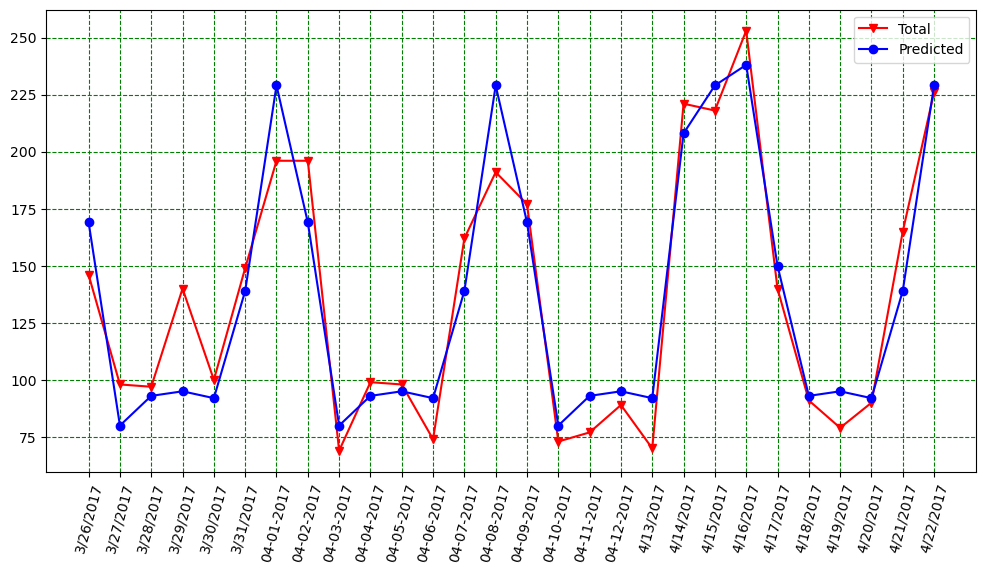

In [54]:
plt.figure(figsize= (12,6))
plt.plot(test_rv.total,color="red",label="Total",marker="v")
plt.plot(test_rv["Predicted_X"],color="blue",label="Predicted",marker="o")
plt.xticks(rotation=75);
plt.grid(color="green",linestyle="--")
plt.legend()